# Theory

## Maldição da dimensionalidade
- Problemas podem surgir com dados com muitas dimensoes (por exemplo visualizar elementos 4D)
- Redução de dimensionalidade tenta destilar dados de dimensão de ordens superiores para inferiores, enquanto preservam ao maximo a variancia dos dados

### K-means Clustering:
- Exemplo de redução de dimensionalidade, reduzindo os dados para K dimensões

## Principal Component Analisys (PCA):
- Encontra os autovalores em dados de ordem superior
  - Com isso, são definidos hiperplanos, que dividem os dados enquanto preservam a maior parte da variancia
  - Os dados são então projetados nesses hiperplanos, que representam as ordens menores que queremos representar
  - Uma implementação popular disso é a Singular Value Decomposition (SVD)
- Muito utilizada para compressão de imangens e reconhecimento facial 

# Code

## PCA Example with the Iris Dataset

In [3]:
# Import das bibliotecas e do dataset iris, 
# um famoso dataset que tem a classificação
# de 150 plantas de 3 classes diferentes
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle


# Carregando o dataset 
iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [19]:
# Extraindo os dados do dataset
X = iris.data
# Pequena modificação, por praticidade
y = iris.target
# Aplicando o PCA para redução de dimensões (4 para 2)
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [7]:
# Cada linha de corresponde a um componente principal, enquanto cada coluna
# corresponde a um recurso original.
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [8]:
# Parametros de variancia (o primeiro das 2 dimensoes e o segundo a soma de ambos)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.9776852063187979


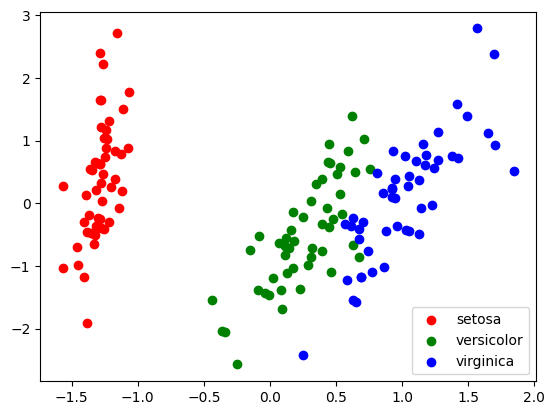

In [27]:
%matplotlib inline

from pylab import *

# Define as cores para as classes do dataset e os IDs das classes
colors = cycle('rgb')
target_ids = range(len(iris.target_names))

# Cria uma nova figura para o plot
pl.figure()

# Plota os dados transformados pelo PCA em um gráfico 2D, com cores representando as classes
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1], c=c, label=label)

pl.legend()
pl.show()

    

## Practice 

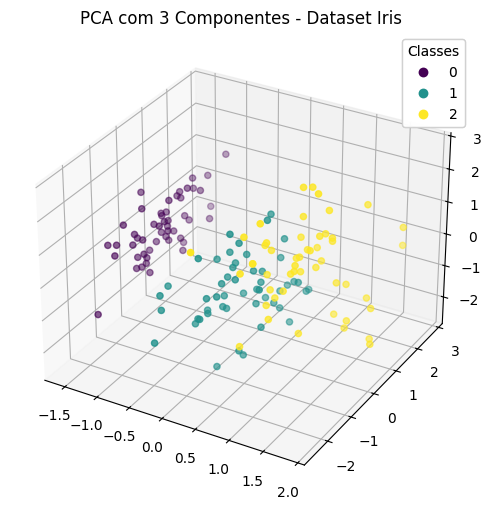

In [28]:
# Aumentando o numero de dimensões para 3
pca = PCA(n_components=3, whiten=True).fit(X)
X_pca = pca.transform(X)

# Criar o plot 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotar os dados transformados em 3D, com cores representando as classes
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')

ax.set_title('PCA com 3 Componentes - Dataset Iris')

legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="best")
ax.add_artist(legend)

# Mostrar o plot
plt.show()